In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("supplier.csv", encoding="latin1")
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Unnamed: 28,Manufacturing Site,First Line Designation,WeightKG,FreightCost,LineItemInsurance
0,62,102-NG-T01,Pre-PQ Process,SCMS-230,ASN-144,Nigeria,PMO - US,Direct Drop,EXW,Air,...,10,850.00,85.00,0.85,NaN,"EY Laboratories, USA",Yes,Weight Captured Separately,Invoiced Separately,NaN
1,68,113-ZW-T01,Pre-PQ Process,SCMS-308,ASN-285,Zimbabwe,PMO - US,Direct Drop,CIP,Air,...,579,14764.50,25.50,0.42,NaN,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
2,69,102-NG-T01,Pre-PQ Process,SCMS-354,ASN-608,Nigeria,PMO - US,Direct Drop,CIP,NaN,...,1500,120000.00,80.00,0.80,NaN,ABBVIE GmbH & Co.KG Wiesbaden,Yes,Weight Captured Separately,Freight Included in Commodity Cost,192.00
3,262,116-ZA-T01,Pre-PQ Process,SCMS-14050,ASN-1251,South Africa,PMO - US,Direct Drop,DDP,NaN,...,40,317.60,7.94,0.04,NaN,GSK Mississauga (Canada),Yes,Weight Captured Separately,Freight Included in Commodity Cost,0.51
4,305,123-NG-T01,Pre-PQ Process,SCMS-15550,ASN-1269,Nigeria,PMO - US,Direct Drop,EXW,Air,...,650,6.50,0.01,0.00,NaN,Inverness Japan,Yes,Weight Captured Separately,Invoiced Separately,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,84142,101-CD-T30,FPQ-8840,SO-41383,DN-2524,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,...,23,53.59,2.33,0.04,NaN,Hetero Unit III Hyderabad IN,Yes,1,522.42,0.08
10320,84706,101-CD-T30,FPQ-8840,SO-41385,DN-2526,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,...,23,53.59,2.33,0.04,NaN,Hetero Unit III Hyderabad IN,Yes,1,522.42,0.08
10321,84724,107-RW-T30,FPQ-9911,SO-42090,DN-2670,Rwanda,PMO - US,From RDC,N/A - From RDC,Air,...,1004,8534.00,8.50,0.04,NaN,"Cipla, Goa, India",Yes,1,3253.88,11.96
10322,86529,114-UG-T30,FPQ-10556,SO-43200,DN-2922,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,...,25,169.00,6.76,0.11,NaN,Hetero Unit III Hyderabad IN,Yes,1,5220.79,0.24


In [3]:
print(data.columns)

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Unnamed: 28',
       'Manufacturing Site', 'First Line Designation', 'WeightKG',
       'FreightCost ', 'LineItemInsurance  '],
      dtype='object')


In [4]:
columns_to_drop = ["ID","Project Code", "PQ #", "PO / SO #", "ASN/DN #","Item Description", "Molecule/Test Type", "Brand", "Dosage", "Dosage Form",
               "Fulfill Via", "Managed By", "Delivery Recorded Date","PO Sent to Vendor Date","PQ First Sent to Client Date", "Sub Classification","Product Group", "Unit of Measure (Per Pack)","Unnamed: 28", "WeightKG",]

data = data.drop(columns=columns_to_drop, errors="ignore")

print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW           Air                1-Oct-07   
1      Zimbabwe              CIP           Air               19-Mar-07   
2       Nigeria              CIP           NaN                5-Jul-07   
3  South Africa              DDP           NaN               29-Jan-08   
4       Nigeria              EXW           Air                2-May-08   

  Delivered to Client Date                   Vendor  Line Item Quantity  \
0                10-Jan-07          EY Laboratories                  10   
1                19-Mar-07     BRISTOL-MYERS SQUIBB                 579   
2                 7-May-07   ACCOUN NIGERIA LIMITED                1500   
3                29-Jan-08  JSI R&T INSTITUTE, INC.                  40   
4                 5-Feb-08            Orgenics, Ltd                 650   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0            850.0       85

In [5]:
country_map = {
    "USA": "United States",
    "US": "United States",
    "UAE": "United Arab Emirates",
    "UK": "United Kingdom",
    "RSA": "South Africa",
    "KSA": "Saudi Arabia",
    "IND": "India",
    "INDIA": "India",
    "India.": "India",
    "IN": "India",
    "CN": "China",
    "JP": "Japan",
    "GR": "Greece",
    "DE": "Germany",
    "IT": "Italy",
    "NL": "Netherlands",
    "SA": "Saudi Arabia",
    "CY": "Cyprus",
    "PL": "Poland",
    "Basel": "Switzerland",
    "Mississauga": "Canada",
    "Wiesbaden": "Germany",
    "Aranda": "Australia",
    "Crawley": "United Kingdom",
    "Madrid": "Spain",
    "Rico": "United States",
    "France": "France",
    "Japan": "Japan",
    "Germany": "Germany",
    "Thailand": "Thailand",
    # ...
}

def split_manufacturing_site(site_text):
    """
    Look for any key from 'country_map' in 'site_text' (case-insensitive).
    If found, return (mapped_country, remainder_of_text).
    Otherwise, return (None, original_text).
    """
    lower_text = site_text.lower()
    for key, mapped_country in country_map.items():
        if key.lower() in lower_text:
            # Remove the key from the original text (case-sensitively)
            remainder = site_text.replace(key, "").strip().strip(",").strip()
            # IMPORTANT: Return the mapped_country here (the standard name)
            return mapped_country, remainder
    return None, site_text

data["Manufacturing country"], data["Manufacturing Site"] = zip(
    *data["Manufacturing Site"].apply(split_manufacturing_site)
)

print(data[["Manufacturing country", "Manufacturing Site"]])

      Manufacturing country             Manufacturing Site
0             United States                EY Laboratories
1                    France                     BMS Meymac
2                   Germany  ABBVIE GmbH & Co.KG Wiesbaden
3              Saudi Arabia       GSK Mississauga (Canada)
4                     India                Inverness Japan
...                     ...                            ...
10319                 India      Hetero Unit III Hyderabad
10320                 India      Hetero Unit III Hyderabad
10321                 India              Cipla, Goa, India
10322                 India      Hetero Unit III Hyderabad
10323                 India           Trinity Biotech, Plc

[10324 rows x 2 columns]


In [6]:
print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW           Air                1-Oct-07   
1      Zimbabwe              CIP           Air               19-Mar-07   
2       Nigeria              CIP           NaN                5-Jul-07   
3  South Africa              DDP           NaN               29-Jan-08   
4       Nigeria              EXW           Air                2-May-08   

  Delivered to Client Date                   Vendor  Line Item Quantity  \
0                10-Jan-07          EY Laboratories                  10   
1                19-Mar-07     BRISTOL-MYERS SQUIBB                 579   
2                 7-May-07   ACCOUN NIGERIA LIMITED                1500   
3                29-Jan-08  JSI R&T INSTITUTE, INC.                  40   
4                 5-Feb-08            Orgenics, Ltd                 650   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0            850.0       85

In [7]:
print(data.isna().sum())

Country                        0
Vendor INCO Term               0
Shipment Mode                360
Scheduled Delivery Date        0
Delivered to Client Date       0
Vendor                         0
Line Item Quantity             0
Line Item Value                0
Pack Price                     0
Unit Price                     0
Manufacturing Site             0
First Line Designation         0
FreightCost                    0
LineItemInsurance            287
Manufacturing country       2100
dtype: int64


In [8]:
data = data.dropna(how="any")
data = data.drop("Manufacturing Site", axis = 1)
data.reset_index(drop=True, inplace=True)
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,FreightCost,LineItemInsurance,Manufacturing country
0,Nigeria,EXW,Air,2-May-08,5-Feb-08,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,Invoiced Separately,0.01,India
1,Haiti,EXW,Air,18-Feb-08,18-Feb-08,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,Invoiced Separately,0.44,India
2,Guyana,EXW,Air,4-Sep-08,1-Apr-08,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,Invoiced Separately,0.00,India
3,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,Freight Included in Commodity Cost,0.65,Switzerland
4,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,Freight Included in Commodity Cost,1.39,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India
7712,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India
7713,Rwanda,N/A - From RDC,Air,6-Aug-12,1-Jun-12,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,3253.88,11.96,India
7714,Uganda,N/A - From RDC,Truck,12-Jun-12,20-Nov-12,SCMS from RDC,25,169.00,6.76,0.11,Yes,5220.79,0.24,India


In [11]:
print(data.columns)

Index(['Country', 'Vendor INCO Term', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date', 'Vendor',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'First Line Designation', 'FreightCost ', 'LineItemInsurance  ',
       'Manufacturing country'],
      dtype='object')


In [12]:
data.to_csv("FOR_API_CLEANED.csv", index=False)

In [13]:
df = pd.read_csv("From_API.csv")
df

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,FreightCost,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse
0,Nigeria,EXW,Air,2-May-08,5-Feb-08,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,Invoiced Separately,0.01,India,22.351115,78.667743,9.600036,7.999972,10148.04
1,Haiti,EXW,Air,18-Feb-08,18-Feb-08,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,Invoiced Separately,0.44,India,22.351115,78.667743,19.139995,-72.357097,10994.09
2,Guyana,EXW,Air,4-Sep-08,1-Apr-08,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,Invoiced Separately,0.00,India,22.351115,78.667743,4.841710,-58.641689,10994.09
3,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,Freight Included in Commodity Cost,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,NaN
4,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,Freight Included in Commodity Cost,1.39,France,46.603354,1.888334,-28.816624,24.991639,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.07
7712,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.07
7713,Rwanda,N/A - From RDC,Air,6-Aug-12,1-Jun-12,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,3253.88,11.96,India,22.351115,78.667743,-1.964663,30.064436,5977.52
7714,Uganda,N/A - From RDC,Truck,12-Jun-12,20-Nov-12,SCMS from RDC,25,169.00,6.76,0.11,Yes,5220.79,0.24,India,22.351115,78.667743,1.533355,32.216658,5977.52


In [14]:
from math import radians, sin, cos, atan2, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Earth radius ~ 6371 km
    r = 6371.0
    return r * c

def compute_if_missing(row):
    if pd.isna(row['Distance_to_Warehouse']):
        return haversine_distance(
            row['Manufacturing_Country_Lat'],
            row['Manufacturing_Country_Lon'],
            row['Warehouse_Country_Lat'],
            row['Warehouse_Country_Lon']
        )
    return row['Distance_to_Warehouse']

df['Distance_to_Warehouse'] = df.apply(compute_if_missing, axis=1)
df

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,FreightCost,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse
0,Nigeria,EXW,Air,2-May-08,5-Feb-08,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,Invoiced Separately,0.01,India,22.351115,78.667743,9.600036,7.999972,10148.040000
1,Haiti,EXW,Air,18-Feb-08,18-Feb-08,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,Invoiced Separately,0.44,India,22.351115,78.667743,19.139995,-72.357097,10994.090000
2,Guyana,EXW,Air,4-Sep-08,1-Apr-08,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,Invoiced Separately,0.00,India,22.351115,78.667743,4.841710,-58.641689,10994.090000
3,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,Freight Included in Commodity Cost,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,8575.053928
4,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,Freight Included in Commodity Cost,1.39,France,46.603354,1.888334,-28.816624,24.991639,8702.227583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.070000
7712,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.070000
7713,Rwanda,N/A - From RDC,Air,6-Aug-12,1-Jun-12,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,3253.88,11.96,India,22.351115,78.667743,-1.964663,30.064436,5977.520000
7714,Uganda,N/A - From RDC,Truck,12-Jun-12,20-Nov-12,SCMS from RDC,25,169.00,6.76,0.11,Yes,5220.79,0.24,India,22.351115,78.667743,1.533355,32.216658,5977.520000


In [15]:
print(df.isna().sum())

Country                        0
Vendor INCO Term               0
Shipment Mode                  0
Scheduled Delivery Date        0
Delivered to Client Date       0
Vendor                         0
Line Item Quantity             0
Line Item Value                0
Pack Price                     0
Unit Price                     0
First Line Designation         0
FreightCost                    0
LineItemInsurance              0
Manufacturing country          0
Manufacturing_Country_Lat      0
Manufacturing_Country_Lon      0
Warehouse_Country_Lat        715
Warehouse_Country_Lon        715
Distance_to_Warehouse        715
dtype: int64


In [16]:
df = df.dropna(how="any")
df

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,FreightCost,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse
0,Nigeria,EXW,Air,2-May-08,5-Feb-08,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,Invoiced Separately,0.01,India,22.351115,78.667743,9.600036,7.999972,10148.040000
1,Haiti,EXW,Air,18-Feb-08,18-Feb-08,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,Invoiced Separately,0.44,India,22.351115,78.667743,19.139995,-72.357097,10994.090000
2,Guyana,EXW,Air,4-Sep-08,1-Apr-08,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,Invoiced Separately,0.00,India,22.351115,78.667743,4.841710,-58.641689,10994.090000
3,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,Freight Included in Commodity Cost,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,8575.053928
4,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,Freight Included in Commodity Cost,1.39,France,46.603354,1.888334,-28.816624,24.991639,8702.227583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.070000
7712,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,522.42,0.08,India,22.351115,78.667743,-2.981434,23.822264,6099.070000
7713,Rwanda,N/A - From RDC,Air,6-Aug-12,1-Jun-12,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,3253.88,11.96,India,22.351115,78.667743,-1.964663,30.064436,5977.520000
7714,Uganda,N/A - From RDC,Truck,12-Jun-12,20-Nov-12,SCMS from RDC,25,169.00,6.76,0.11,Yes,5220.79,0.24,India,22.351115,78.667743,1.533355,32.216658,5977.520000


In [17]:
KM_TO_MILES = 0.621371  

df['Distance_to_Warehouse_mi'] = (df['Distance_to_Warehouse'].astype(float) * KM_TO_MILES).round(0).astype(int)

df[['Distance_to_Warehouse', 'Distance_to_Warehouse_mi']].head()


/var/folders/q1/3n6wbn716vvckd_78hpynvkc0000gn/T/ipykernel_75667/1108760237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_to_Warehouse_mi'] = (df['Distance_to_Warehouse'].astype(float) * KM_TO_MILES).round(0).astype(int)


,Distance_to_Warehouse,Distance_to_Warehouse_mi
0,10148.040000,6306
1,10994.090000,6831
2,10994.090000,6831
3,8575.053928,5328
4,8702.227583,5407


In [18]:
df = df.drop("Distance_to_Warehouse", axis = 1)
df = df.drop("FreightCost", axis = 1)
df

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi
0,Nigeria,EXW,Air,2-May-08,5-Feb-08,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306
1,Haiti,EXW,Air,18-Feb-08,18-Feb-08,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831
2,Guyana,EXW,Air,4-Sep-08,1-Apr-08,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831
3,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328
4,South Africa,DDP,Truck,24-Apr-08,24-Apr-08,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790
7712,"Congo, DRC",N/A - From RDC,Air,22-Mar-12,22-Mar-12,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790
7713,Rwanda,N/A - From RDC,Air,6-Aug-12,1-Jun-12,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714
7714,Uganda,N/A - From RDC,Truck,12-Jun-12,20-Nov-12,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714


In [19]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], format='%d-%b-%y')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], format='%d-%b-%y')

df['Delay'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

print(df)

           Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0          Nigeria              EXW           Air              2008-05-02   
1            Haiti              EXW           Air              2008-02-18   
2           Guyana              EXW           Air              2008-09-04   
3     South Africa              DDP         Truck              2008-04-24   
4     South Africa              DDP         Truck              2008-04-24   
...            ...              ...           ...                     ...   
7711    Congo, DRC   N/A - From RDC           Air              2012-03-22   
7712    Congo, DRC   N/A - From RDC           Air              2012-03-22   
7713        Rwanda   N/A - From RDC           Air              2012-08-06   
7714        Uganda   N/A - From RDC         Truck              2012-06-12   
7715      Tanzania              EXW           Air              2013-12-23   

     Delivered to Client Date                Vendor  Line Item Quantity  \


In [20]:
df.to_csv("Final_dataset.csv", index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

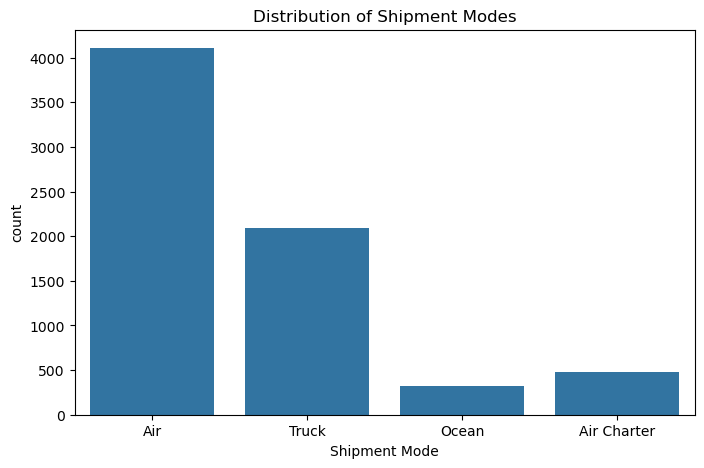

In [27]:

plt.figure(figsize=(8,5))
sns.countplot(x='Shipment Mode', data = df)  
plt.title('Distribution of Shipment Modes')
plt.show()


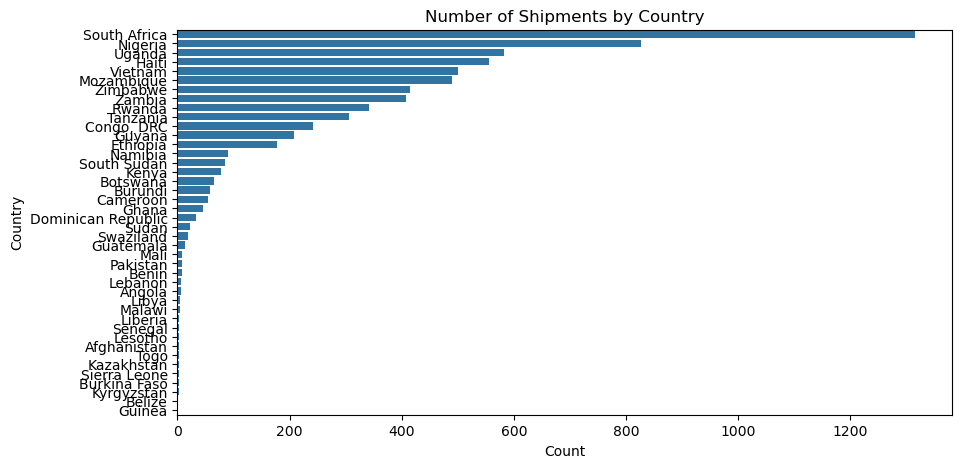

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(y='Country', data=df,
              order=df['Country'].value_counts().index)
plt.title('Number of Shipments by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

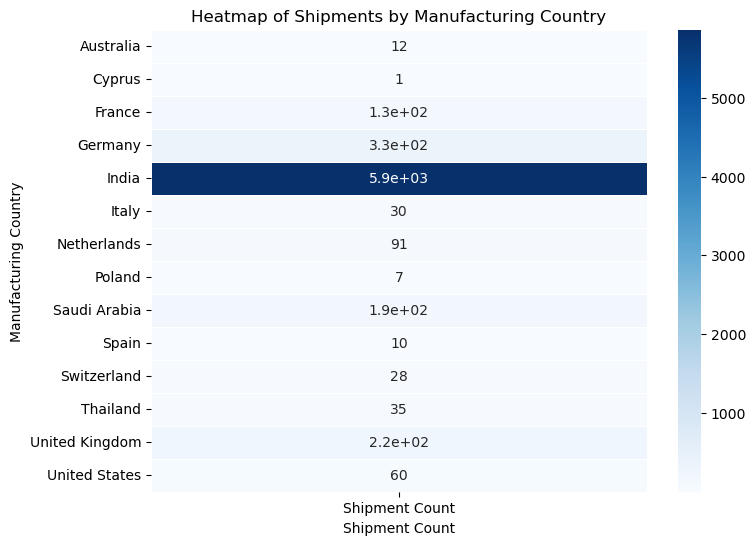

In [29]:
country_counts = df['Manufacturing country'].value_counts().reset_index()
country_counts.columns = ['Manufacturing Country', 'Shipment Count']

pivot_data = country_counts.pivot_table(values='Shipment Count', index='Manufacturing Country')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Shipments by Manufacturing Country')
plt.xlabel('Shipment Count')
plt.ylabel('Manufacturing Country')
plt.show()

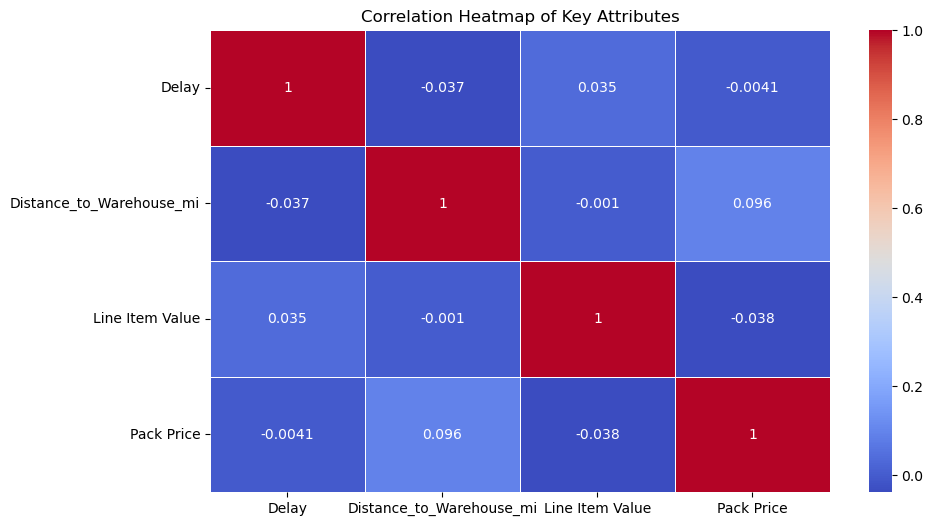

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Delay', 'Distance_to_Warehouse_mi', 'Line Item Value', 'Pack Price']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Attributes')
plt.show()

<Figure size 1200x600 with 0 Axes>

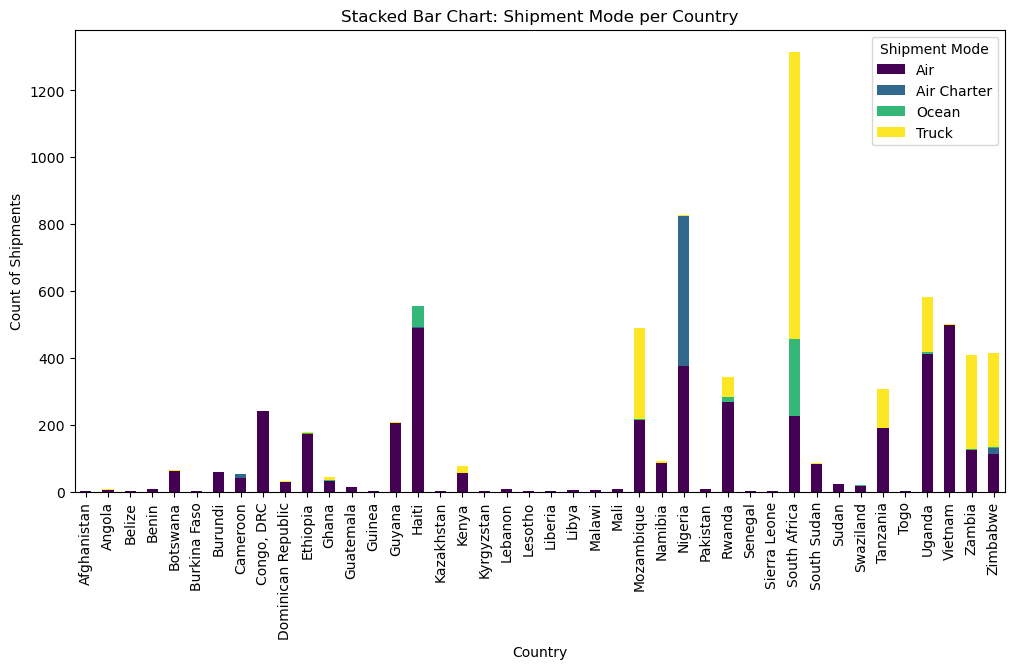

In [31]:
plt.figure(figsize=(12, 6))
shipment_mode_country = df.groupby(['Country', 'Shipment Mode']).size().unstack()
shipment_mode_country.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Stacked Bar Chart: Shipment Mode per Country")
plt.xlabel("Country")
plt.ylabel("Count of Shipments")
plt.xticks(rotation=90)
plt.legend(title="Shipment Mode")
plt.show()

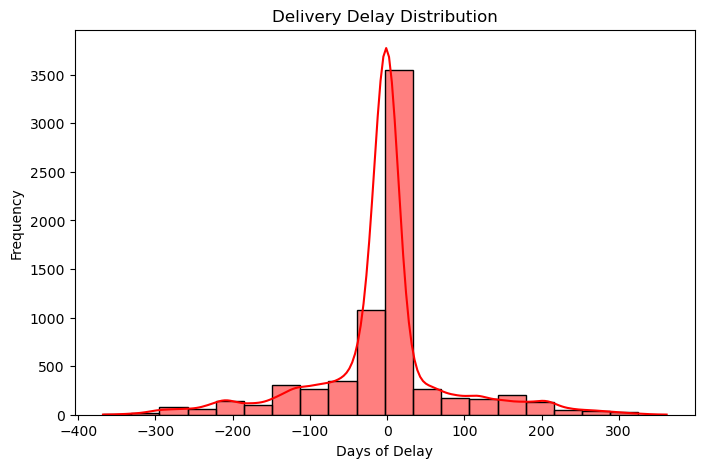

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delay'].dropna(), bins=20, kde=True, color='red')
plt.title('Delivery Delay Distribution')
plt.xlabel('Days of Delay')
plt.ylabel('Frequency')
plt.show()

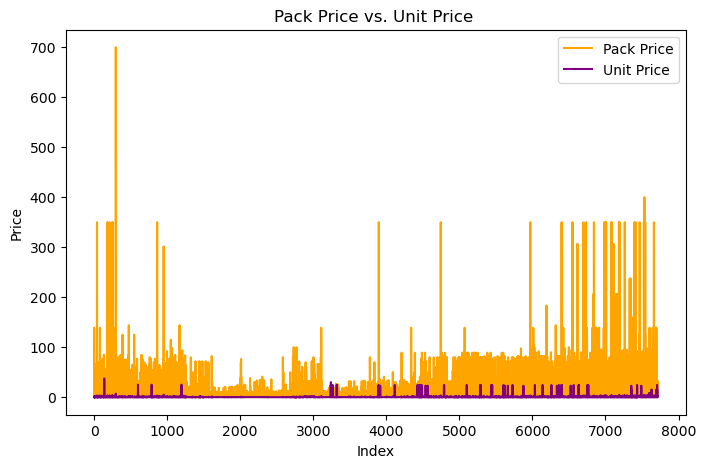

In [33]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x=df.index, y='Pack Price', label='Pack Price', color='orange')
sns.lineplot(data=df, x=df.index, y='Unit Price', label='Unit Price', color='purple')
plt.legend()
plt.title('Pack Price vs. Unit Price ')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

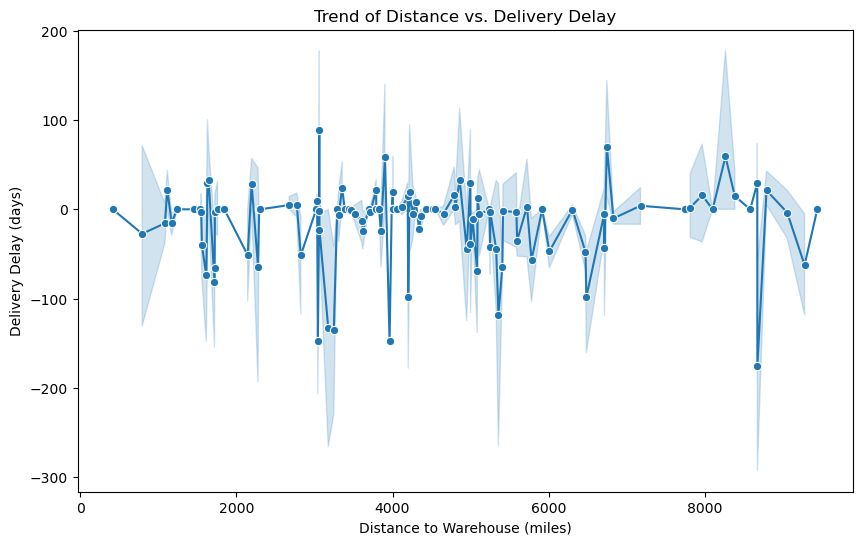

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Distance_to_Warehouse_mi'], y=df['Delay'], marker='o')
plt.xlabel('Distance to Warehouse (miles)')
plt.ylabel('Delivery Delay (days)')
plt.title('Trend of Distance vs. Delivery Delay')
plt.show()

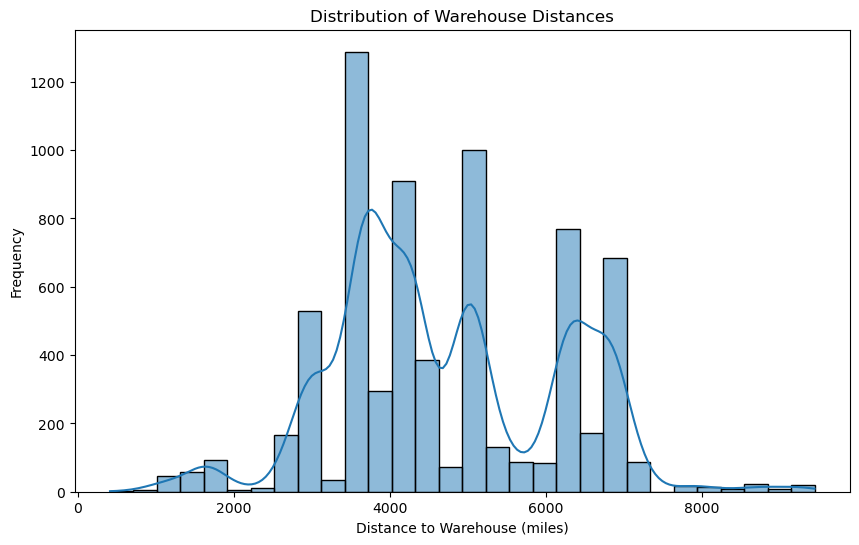

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance_to_Warehouse_mi'], bins=30, kde=True)
plt.xlabel('Distance to Warehouse (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Warehouse Distances')
plt.show()

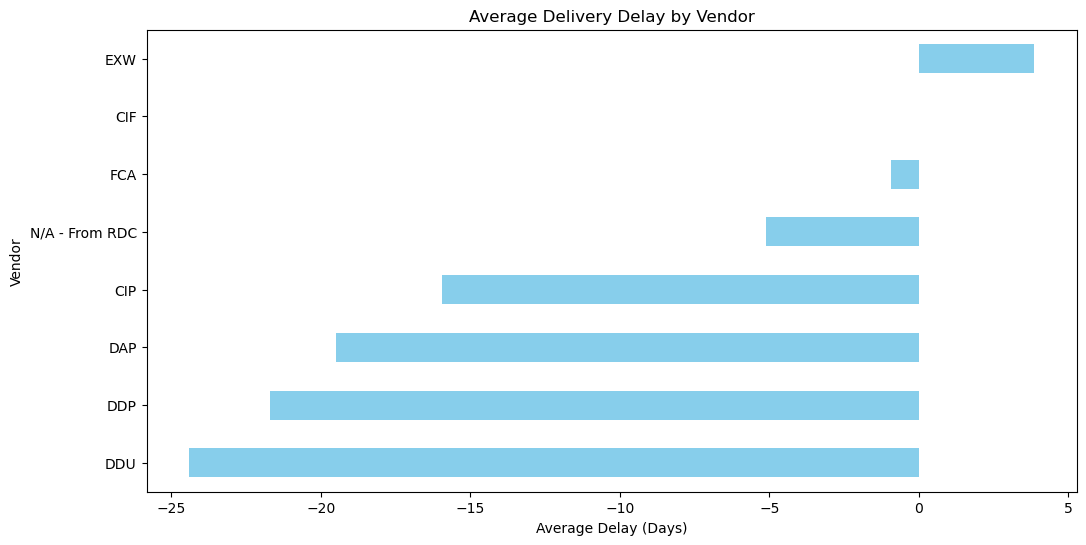

In [36]:
avg_delay_by_vendor = df.groupby('Vendor INCO Term')['Delay'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_delay_by_vendor.plot(kind='barh', color='skyblue')
plt.xlabel('Average Delay (Days)')
plt.ylabel('Vendor')
plt.title('Average Delivery Delay by Vendor')
plt.show()

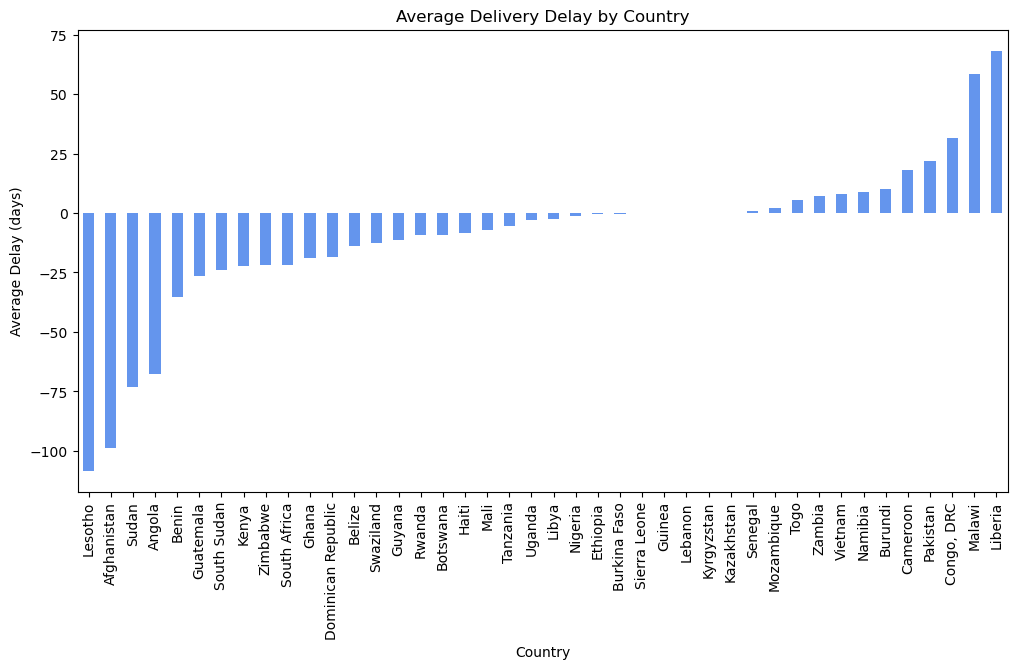

In [37]:
plt.figure(figsize=(12, 6))
df.groupby('Country')['Delay'].mean().sort_values().plot(kind='bar', color='cornflowerblue')
plt.xlabel('Country')
plt.ylabel('Average Delay (days)')
plt.title('Average Delivery Delay by Country')
plt.xticks(rotation=90)
plt.show()

/var/folders/q1/3n6wbn716vvckd_78hpynvkc0000gn/T/ipykernel_75667/3804254232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Vendor'], y=df['Line Item Value'], palette='plasma', scale='width')
/var/folders/q1/3n6wbn716vvckd_78hpynvkc0000gn/T/ipykernel_75667/3804254232.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=df['Vendor'], y=df['Line Item Value'], palette='plasma', scale='width')


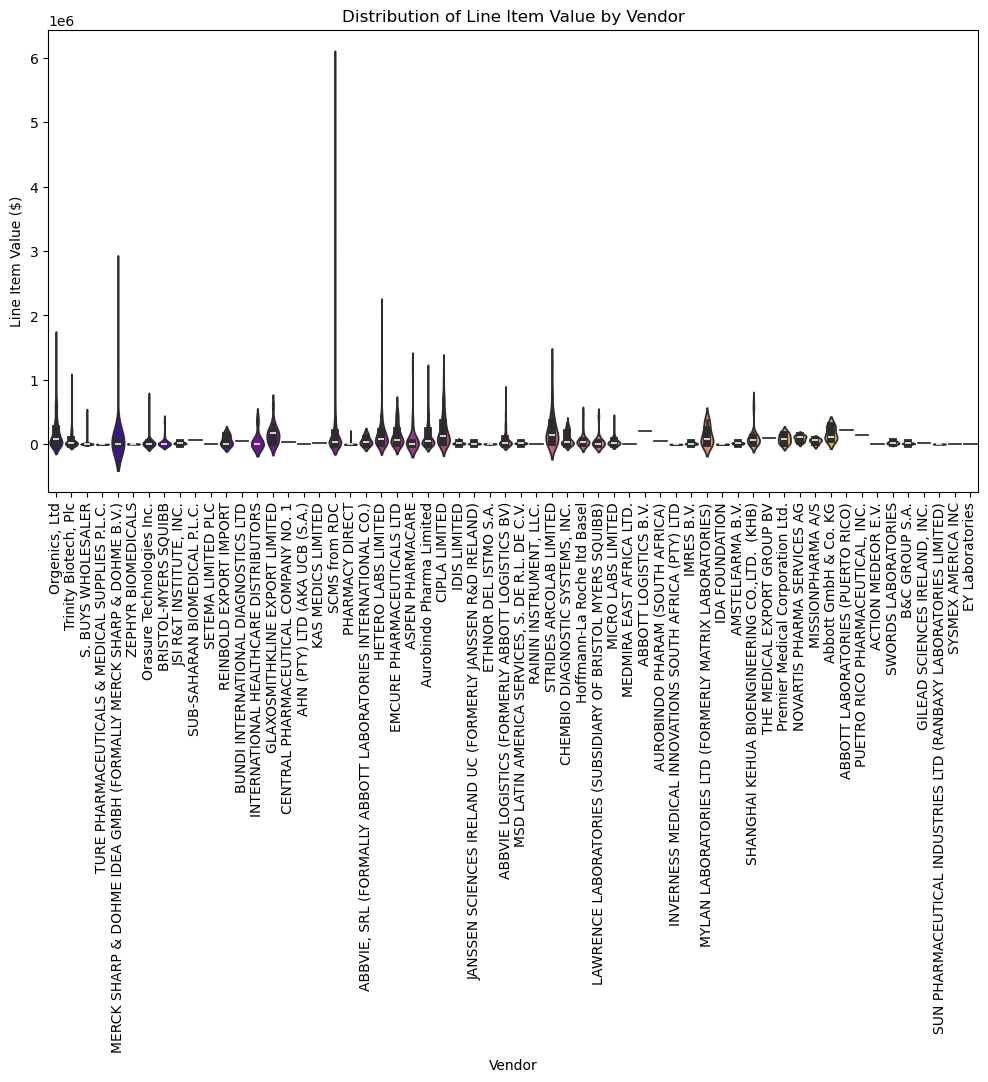

In [38]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Vendor'], y=df['Line Item Value'], palette='plasma', scale='width')
plt.xlabel('Vendor')
plt.ylabel('Line Item Value ($)')
plt.title('Distribution of Line Item Value by Vendor')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

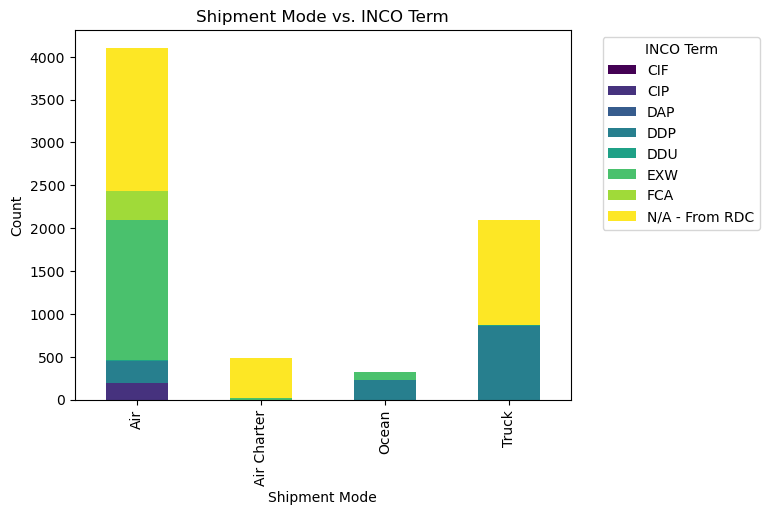

In [39]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['Shipment Mode'], df['Vendor INCO Term']).plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.title('Shipment Mode vs. INCO Term')
plt.legend(title='INCO Term', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [41]:
import geopandas as gpd

<Figure size 2200x1200 with 0 Axes>

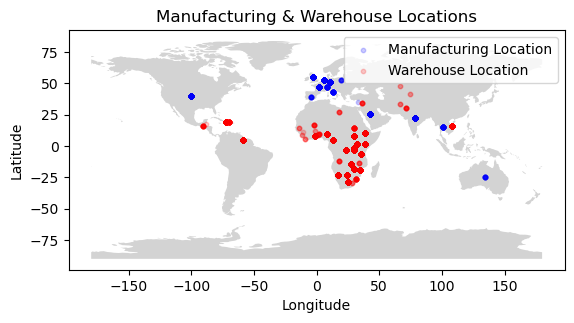

In [42]:
import geopandas as gpd
import geodatasets

world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

plt.figure(figsize=(22, 12))
ax = world.plot(color='lightgray')


plt.scatter(df['Manufacturing_Country_Lon'], df['Manufacturing_Country_Lat'], 
            color='blue', label='Manufacturing Location', alpha=0.2, s=10)

plt.scatter(df['Warehouse_Country_Lon'], df['Warehouse_Country_Lat'], 
            color='red', label='Warehouse Location', alpha=0.2, s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Manufacturing & Warehouse Locations')
plt.legend()
plt.show()